## Data Preprocessing

#### Importing Libraries

In [1]:
# pip install -U scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump, load


In [3]:
import os
print(os.getcwd())

c:\Users\khati\GITHUB\python\project


In [4]:
train_df = pd.read_csv(r"dataset\train.csv")
test_df = pd.read_csv(r"dataset\test.csv")
gender_df = pd.read_csv(r"dataset\gender_submission.csv")

In [5]:
print(train_df.shape)
print(test_df.shape)
print(gender_df.shape)

(891, 12)
(418, 11)
(418, 2)


survival --> Survival 0=no 1=yes
pclass --> Ticket Class  1=1st 2=2nd 3=3rd
sibsp --> #siblings/spouses aboard
parch --> # of parents/children aboard 
ticket --> Ticket number
fare --> passenger Fare
cabin --> Cabin number 

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above all the categorical features are dropped (Name,Sex,Cabin,Embarked)

Here is the stats of categorical variale

In [8]:
cat_features = train_df.dtypes[train_df.dtypes=='object'].index
type(cat_features) #pandas.core.indexes.base.Index
train_df[cat_features].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


Delete the passenger id column as it is not in used

In [9]:
del train_df['PassengerId']

In [10]:
train_df['Name'].describe()

count                     891
unique                    891
top       Dooley, Mr. Patrick
freq                        1
Name: Name, dtype: object

In [11]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [12]:
train_df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

### Convert numerical data to categorical data

Survived Column

In [13]:
new_survived = pd.Categorical(train_df["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])

In [14]:
new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [15]:
type(new_survived)

pandas.core.arrays.categorical.Categorical

In [16]:
train_df['Survived']=new_survived

Pclass column

In [17]:
train_df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [18]:
new_Pclas = pd.Categorical(train_df["Pclass"])
new_Pclas = new_Pclas.rename_categories(["Class1","Class2","Class3"])
new_Pclas

['Class3', 'Class1', 'Class3', 'Class1', 'Class3', ..., 'Class2', 'Class1', 'Class3', 'Class1', 'Class3']
Length: 891
Categories (3, object): ['Class1', 'Class2', 'Class3']

In [19]:
train_df["Pclass"] = new_Pclas
train_df["Pclass"]

0      Class3
1      Class1
2      Class3
3      Class1
4      Class3
        ...  
886    Class2
887    Class1
888    Class3
889    Class1
890    Class3
Name: Pclass, Length: 891, dtype: category
Categories (3, object): ['Class1', 'Class2', 'Class3']

Grouping cabin by the first letter of cabin

In [20]:
char_cabin = train_df["Cabin"].astype(str)
new_cabin = np.array([cabin[0] for cabin in char_cabin])
new_cabin = pd.Categorical(new_cabin)
new_cabin.describe()
# type(train_df["Cabin"][0])

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [21]:
train_df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

### Filling missing value with median

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

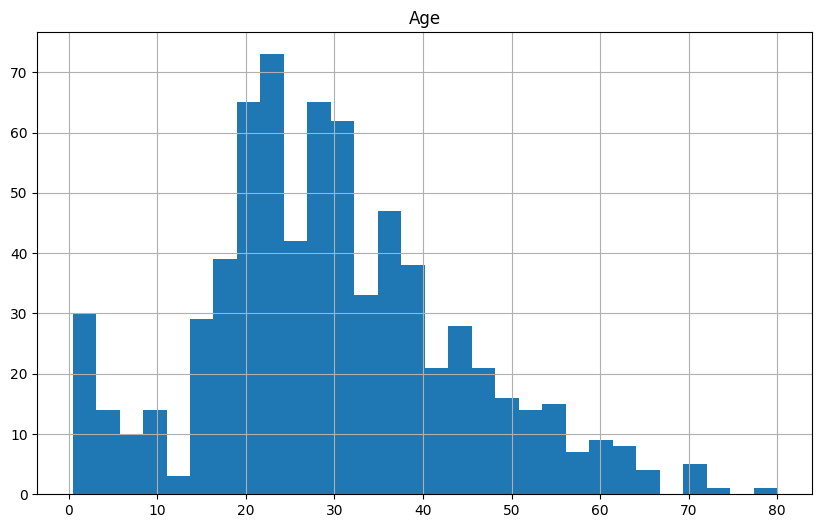

In [22]:
train_df.hist(column='Age',figsize=(10,6),bins=30)

In [23]:
new_age = np.where(train_df['Age'].isnull()==True,25,train_df["Age"])
train_df["Age"] = new_age
train_df["Age"].describe()

count    891.000000
mean      28.765623
std       13.136649
min        0.420000
25%       22.000000
50%       25.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: >

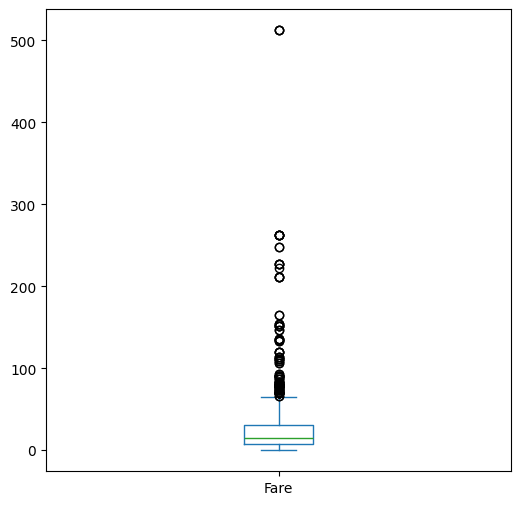

In [25]:
train_df["Fare"].plot(kind="box",figsize=(6,6))

In [26]:
train_df[train_df["Fare"]== max(train_df['Fare'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,Survived,Class1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,Survived,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,Survived,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### Created new variable family

In [27]:
train_df['Family'] = train_df['SibSp']+train_df['Parch']
max(train_df['Family'])

10

## Data Analysis

### Doing some analysis using matplotlib

Survived and died plot

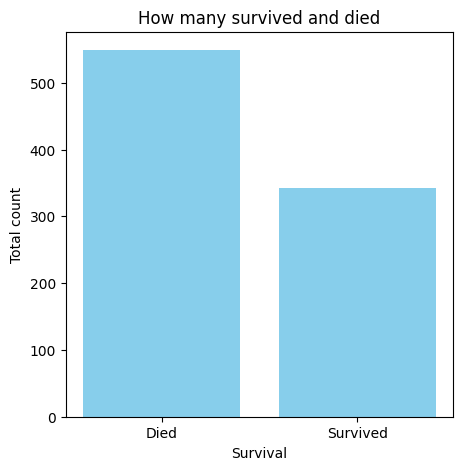

In [28]:
survival_counts = train_df['Survived'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(survival_counts.index,survival_counts.values,color = 'skyblue')
plt.title('How many survived and died')
plt.xlabel('Survival')
plt.ylabel('Total count')
plt.show()


Survival rate by gender

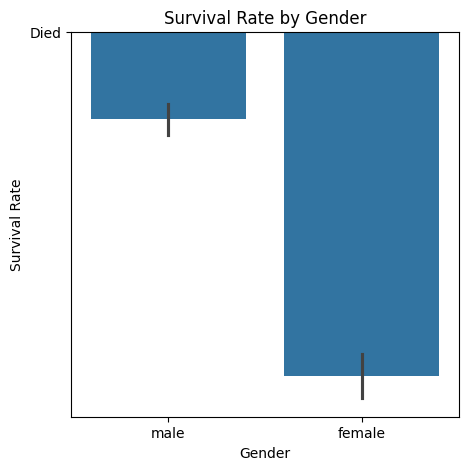

In [29]:
plt.figure(figsize=(5,5))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

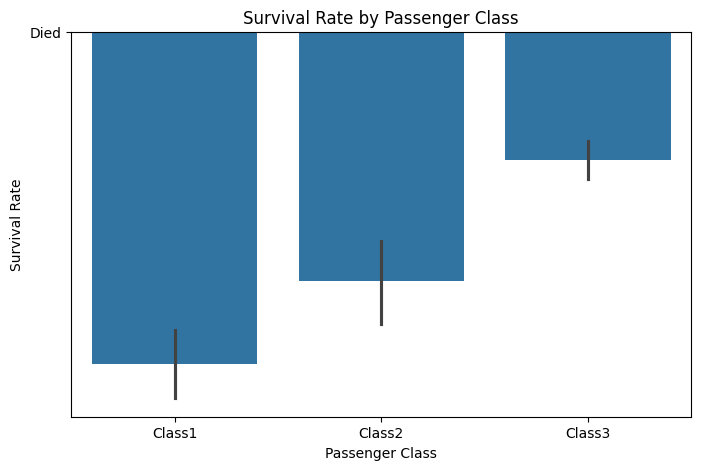

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()